#### Basket Size Prediction

In [20]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
import pickle
from sklearn.model_selection import train_test_split


In [17]:
df = pd.read_pickle('basket_df.pkl')
df = df.reset_index(drop=True)
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,basket_size
0,2398795,1,2,3,7,15.0,6
1,3108588,1,8,1,14,14.0,6
2,550135,1,7,1,9,20.0,5
3,2539329,1,1,2,8,NaN,5
4,2550362,1,10,4,8,30.0,9


In [18]:
X = df.drop(columns='basket_size')
y= df['basket_size']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
model = XGBRegressor(
    objective="reg:squarederror",
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method="hist", 
    n_jobs=-1,
    random_state=42
)

model.fit(X, y,
          eval_set=[(X_test, y_test)],
          verbose=10)

y_pred = model.predict(X_test)


[0]	validation_0-rmse:7.50493
[10]	validation_0-rmse:7.43644
[20]	validation_0-rmse:7.40202
[30]	validation_0-rmse:7.38867
[40]	validation_0-rmse:7.38343
[50]	validation_0-rmse:7.38086
[60]	validation_0-rmse:7.37901
[70]	validation_0-rmse:7.37756
[80]	validation_0-rmse:7.37626
[90]	validation_0-rmse:7.37486
[99]	validation_0-rmse:7.37361


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

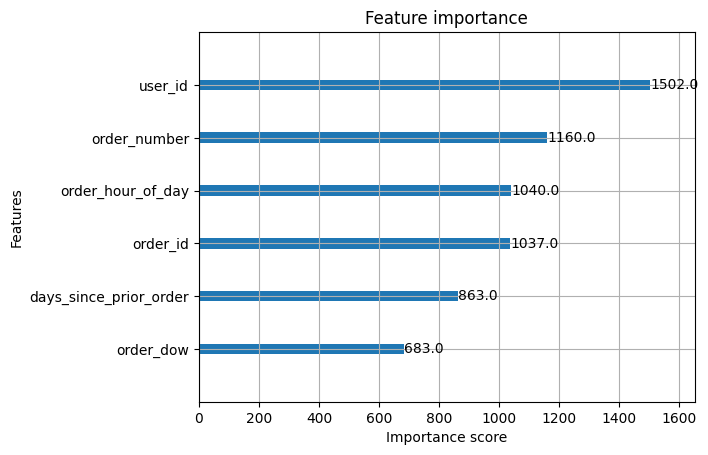

In [23]:
xgb.plot_importance(model)
